In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import sys


class Stock:
    def __init__(self, ticker, name):
        self.ticker = ticker
        self.name = name
        self.stock = yf.Ticker(ticker)

    def history(self, start_date, end_date=None):
        df = self.stock.history(start=start_date, end=end_date)
        df = df.drop(columns=['Open', 'High', 'Low', 'Stock Splits', 'Dividends'])
        # Calculate a price index for the stock's historic prices.
        df['Price index'] = (df['Close'] / df['Close'].iloc[0]) * 100
        self.history = df


def plotter(ax, stock, color='C0'):
    ax.plot(stock.history.index, stock.history['Close'], color)
    ax.set_title(stock.name)
    labels = ax.get_xticklabels()
    set = plt.setp(labels, rotation=45)


In [2]:
start_date = '2022-08-01'

msft = Stock('MSFT', 'Microsoft Corporation')
msft.history(start_date)
appl = Stock('AAPL', 'Apple Inc.')
appl.history(start_date)
oracle = Stock('ORCL', 'Oracle Corporation')
oracle.history(start_date)
deere = Stock('DE', 'Deere & Company')
deere.history(start_date)
cat = Stock('CAT', 'Caterpillar Inc.')
cat.history(start_date)
volvo = Stock('VOLV-B.ST', 'AB Volvo')
volvo.history(start_date)

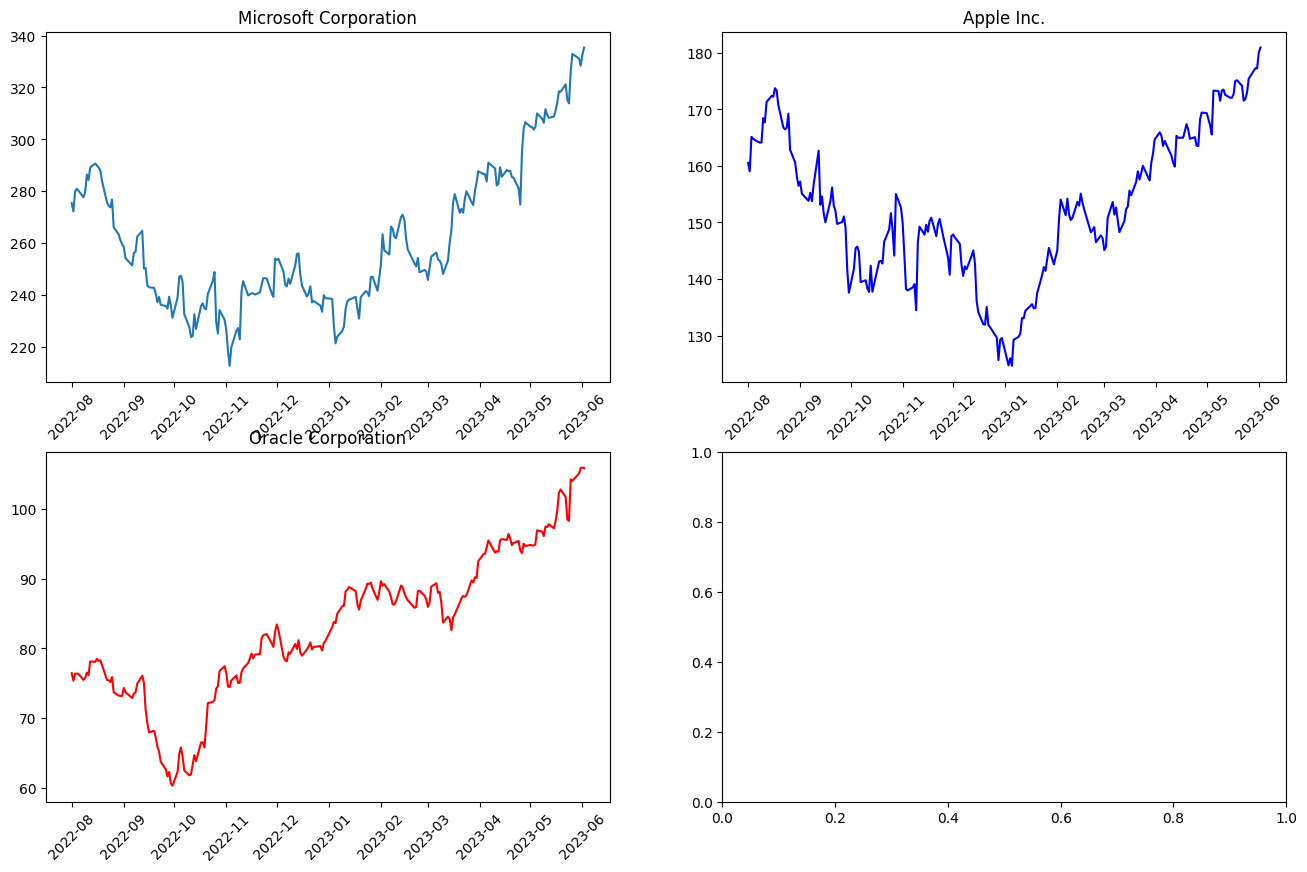

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
#fig.tight_layout(pad=5.0)
plotter(axs[0, 0], msft, 'C0')
plotter(axs[0, 1], appl, 'b')
plotter(axs[1, 0], oracle, 'r')

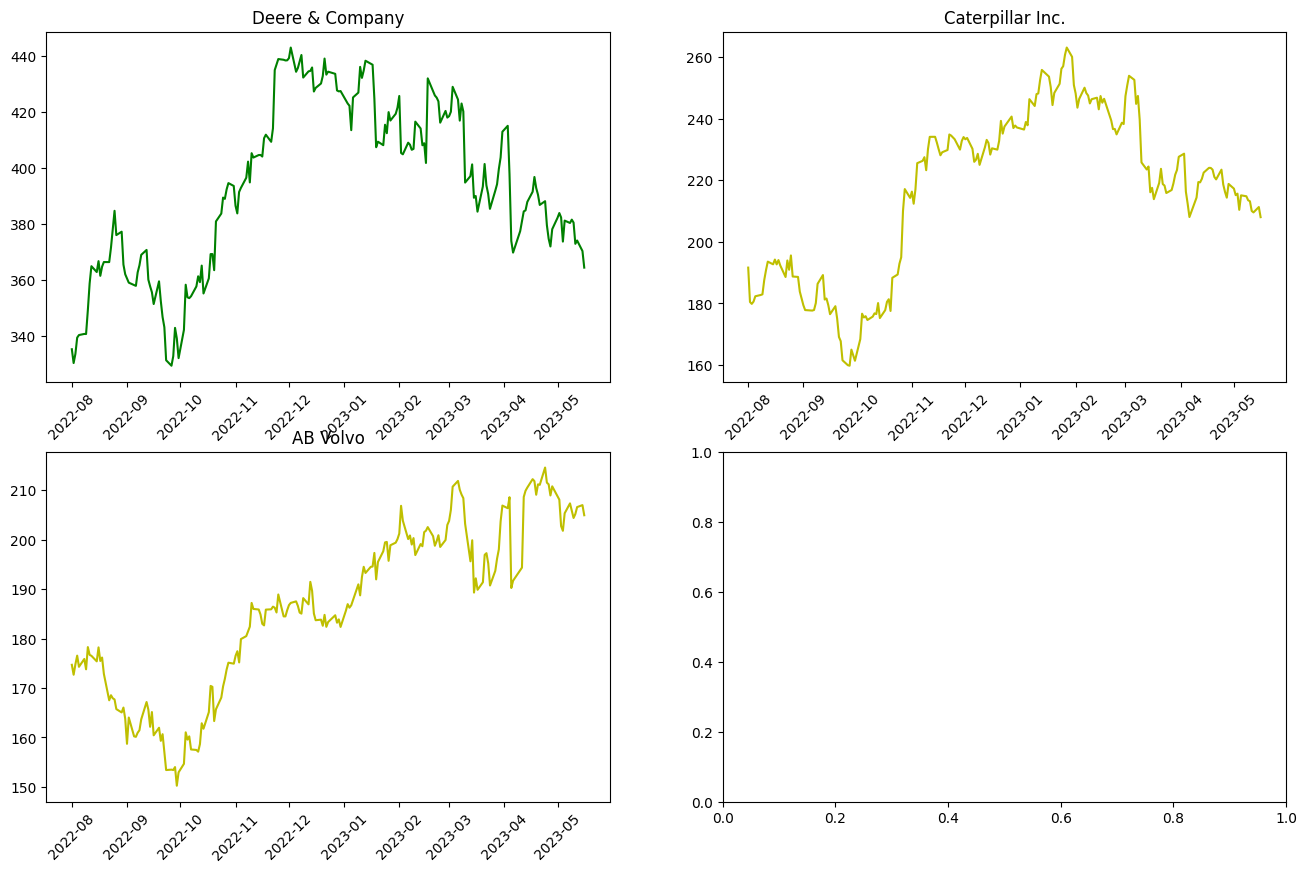

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
plotter(axs[0, 0], deere, 'g')
plotter(axs[0, 1], cat, 'y')
plotter(axs[1, 0], volvo, 'y')

In [5]:
def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e9:
        s = '${:1.0f}B'.format(x*1e-9)
    elif x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

In [1]:
cat_earnings = cat.stock.earnings

labels = cat_earnings.index
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cat_earnings['Revenue'], width, label='Revenue')
rects2 = ax.bar(x + width/2, cat_earnings['Earnings'], width, label='Earnings')

ax.set_ylabel('Scores')
ax.set_title(f'Revenue and earnings for {cat.name}')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.yaxis.set_major_formatter(currency)

label_txt = ax.get_label()
fig.tight_layout()


NameError: name 'cat' is not defined

In [11]:
bud = Stock('BUD', 'anheuser busch')
bud.history(start_date)
tar = Stock('TGT', 'target')
tar.history(start_date)

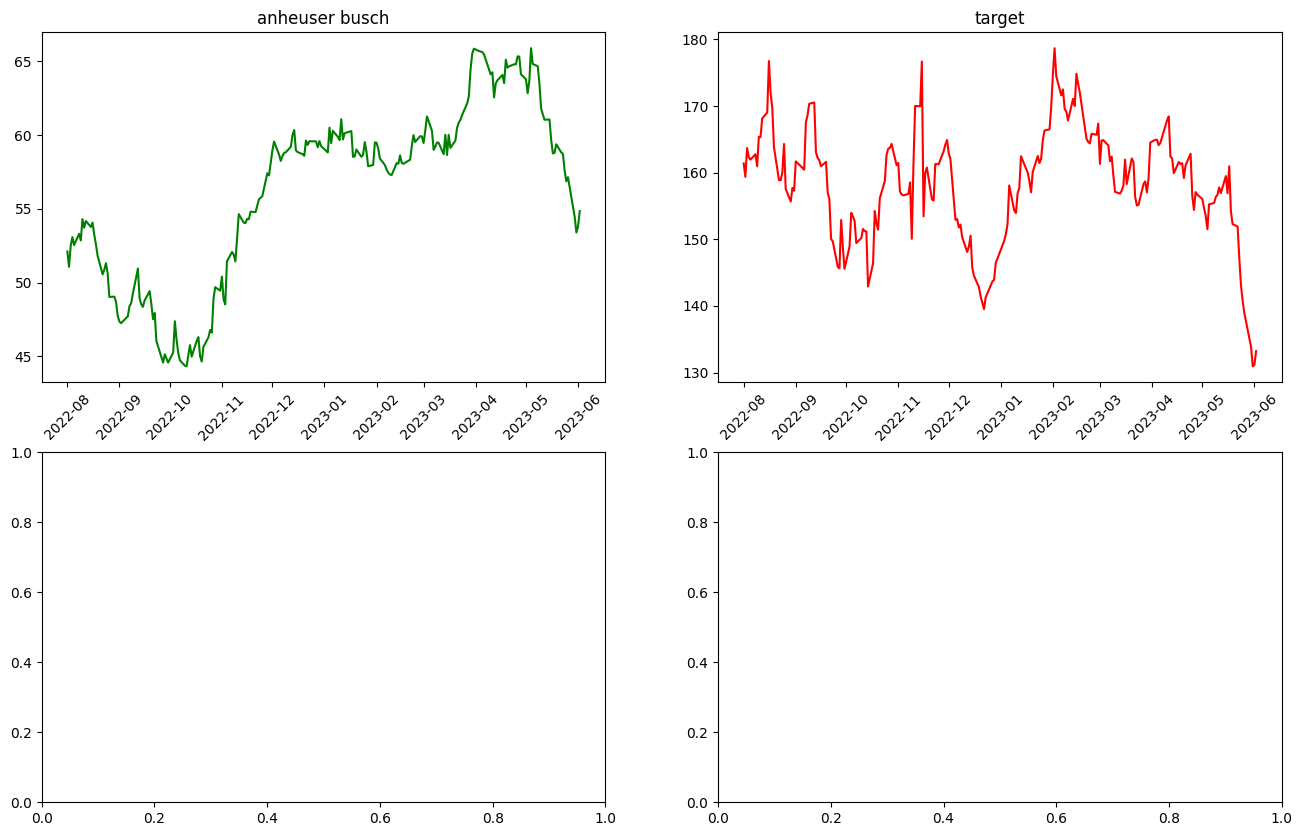

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
plotter(axs[0, 0], bud, 'g')
plotter(axs[0, 1], tar, 'r')